Exploring diffusion-weighted imaging (dwi) DATA

In [2]:
import os
data_path = "ds005713-download/"
print(os.listdir(data_path))  # Explore downloaded dataset

['sub-13', 'sub-14', 'sub-026', 'sub-22', 'sub-010', 'sub-25', 'sub-017', 'sub-028', 'sub-035fu', 'sub-071fu', 'sub-088', 'sub-043', 'sub-044', 'sub-010fu', 'sub-086', 'sub-072', 'sub-40', 'sub-47', 'sub-081', 'sub-016', 'sub-24', 'sub-029', 'sub-23', 'sub-15', 'sub-020', 'sub-12', 'sub-080', 'sub-46', 'sub-074', 'sub-41', 'sub-073', 'sub-087', 'sub-48', 'sub-045', 'sub-089', 'sub-050fu', 'sub-042', 'sub-130', 'sub-137', 'sub-108', 'sub-101', '.DS_Store', 'sub-106', 'sub-082fu', 'sub-139', 'sub-104fu', 'sub-107', 'sub-138', 'sub-100', 'sub-100fu', 'sub-136', 'sub-109', 'sub-025fu', 'sub-072fu', 'sub-095fu', 'sub-113', 'sub-057fu', 'CHANGES', 'sub-114', 'sub-122', 'sub-125', 'sub-053fu', 'sub-117fu', 'sub-017fu', 'sub-124', 'sub-123', 'sub-115', 'sub-112', 'sub-094', 'sub-060', 'sub-067', 'sub-049fu', 'sub-058', 'sub-051', 'sub-028fu', 'sub-056', 'sub-043fu', 'sub-069', 'sub-30', 'sub-08', 'sub-37', 'sub-01', 'sub-39', 'sub-06', 'sub-057', 'sub-009fu', 'sub-068', 'sub-050', 'sub-085fu',

In [4]:
import nibabel as nib
# Path to the NIfTI file
dataset_path = "ds005713-download/"
nifti_file = os.path.join(dataset_path, "sub-01", "anat", "sub-01_run-01_T1w.nii.gz")

# Load the NIfTI file
img = nib.load(nifti_file)

# Get the image data as a NumPy array
data = img.get_fdata()

# Inspect the data
# Shape of data tells you how many slices each axis has 0 - 1 - 2
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")

Shape of the data: (340, 512, 512)
Data type: float64


In [8]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "ds005713-download/"
#dwi.bval: Contains diffusion b-values (intensity of diffusion weighting).
#dwi.bvec: Contains gradient directions used for diffusion encoding.

dwi_file = os.path.join(dataset_path, "sub-01", "dwi", "sub-01_run-01_dwi.nii.gz")
dwi_img = nib.load(dwi_file)
dwi_data = dwi_img.get_fdata()

print(f"DWI data shape: {dwi_data.shape}")  # Example output: (128, 128, 70, 30)

DWI data shape: (128, 128, 68, 65)


In [9]:
# Load b-values
bval_file = os.path.join(dataset_path, "sub-01", "dwi", "sub-01_run-01_dwi.bval")
with open(bval_file, "r") as f:
    bvals = [float(b) for b in f.read().split()]
print(f"b-values: {bvals[:10]}")  # Show the first 10 b-values

# Load b-vectors
bvec_file = os.path.join(dataset_path, "sub-01", "dwi", "sub-01_run-01_dwi.bvec")
with open(bvec_file, "r") as f:
    bvecs = [list(map(float, line.split())) for line in f.readlines()]
print(f"b-vectors (first 3 directions): {bvecs[:3]}")

b-values: [0.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0]
b-vectors (first 3 directions): [[0.0, 0.0, 0.690069, 0.78984, -0.168141, -0.478888, -0.782919, 0.388299, -0.444181, -0.592058, 0.800183, 0.05635, -0.969357, 0.209369, -0.0260399, 0.994064, 0.11424, 0.50321, -0.554119, -0.880171, -0.60302, 0.479619, 0.2312, -0.01603, -0.802079, -0.32908, 0.789234, -0.333259, 0.535821, -0.431988, 0.32306, -0.49307, -0.966783, -0.277319, 0.34132, 0.674412, 0.910067, 0.25491, 0.727991, -0.835119, -0.288299, -0.13805, 0.942956, -0.713741, 0.14588, 0.277949, 0.294899, 0.44128, -0.228261, 0.0671698, -0.9317, -0.0657998, -0.605679, 0.581389, 0.583007, -0.704249, 0.72615, -0.833967, -0.355709, -0.617059, 0.913257, 0.0186, 0.57152, -0.20343, 0.87431], [0.0, -2.98023e-08, -0.576359, 0.53236, -0.957263, 0.772417, -0.28665, -0.915578, 0.2725, -0.756978, 0.0255401, 0.74161, 0.245589, 0.967308, -0.595847, 0.0914704, 0.465142, -0.54587, -0.31078, 0.32132, 0.78685, 0.369989, -0.733

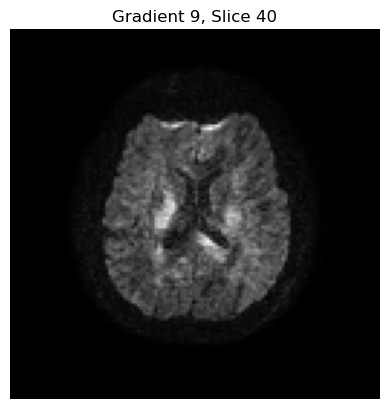

In [11]:
gradient = 9  # Select a diffusion gradient direction
slice_index = 40  # Choose a slice
slice_data = dwi_data[:, :, slice_index, gradient]

# Normalize and visualize the slice
slice_data_normalized = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
plt.imshow(slice_data_normalized.T, cmap="gray", origin="lower")
plt.title(f"Gradient {gradient}, Slice {slice_index}")
plt.axis("off")
plt.show()